# King County Homes

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
pwd

'/Users/em/Desktop/Project/bsc-phase-two-project/notebooks/exploratory/member-3'

In [7]:
path = '../../../data/kc_house_data.csv'
df = pd.read_csv(path)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [25]:
df = df.drop(15856) #dropped the house with 33 bedrooms as it was an outlier 

In [36]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.004180,0.011581,-0.023721,0.008169,-0.010831,0.021589,-0.012019,-0.008195,-0.001766,0.020643,-0.002734,-0.138570
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.276297,0.395739,0.036031,0.667964,0.605392,0.053965,0.129603,-0.053409,0.306687,0.022047,0.585267,0.082849
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002303,0.080922,0.023440,0.366174,0.492543,0.160736,0.019429,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.067281,0.186446,-0.126443,0.665834,0.686664,0.507166,0.051044,-0.204778,0.024301,0.224889,0.569878,0.088297
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.110228,0.282528,-0.059397,0.762776,0.876448,0.318140,0.055654,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.023142,0.075295,-0.008806,0.114726,0.184134,0.052939,0.004511,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.021879,0.028424,-0.264013,0.458783,0.523970,0.489175,0.003525,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,-0.004180,0.276297,-0.002303,0.067281,0.110228,0.023142,0.021879,1.000000,0.406654,0.017656,0.087381,0.075460,-0.026083,0.087243,0.031059,-0.012768,-0.039869,0.088858,0.032000
view,0.011581,0.395739,0.080922,0.186446,0.282528,0.075295,0.028424,0.406654,1.000000,0.045776,0.249721,0.166290,-0.054577,0.100960,0.085284,0.006154,-0.077907,0.279554,0.073328
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.017656,0.045776,1.000000,-0.146854,-0.158826,-0.361555,-0.061840,0.002835,-0.015209,-0.105800,-0.092979,-0.003093


In [42]:
df.value_counts('sqft_living')

sqft_living
1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
2656      1
2655      1
2653      1
2643      1
370       1
Length: 1034, dtype: int64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

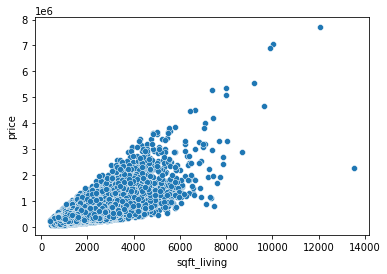

In [44]:
sns.scatterplot(data=df, x="sqft_living", y="price")

In [ ]:
df.loc[]